**DATA SCIENCE PROJECT  : Analyze the dataset about smartphones features and then predict the price accordingly**.
**Submitted By - Khushi Panwar, Computer Science**

**1) Import data and libraries : import all useful libraries. Then, load the data.**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# load data (for exploring and cleaning we load test and train datasets)
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

**2) Fast looking on data : Let`s see head of our data frames, list of columns, sizes, descriptions and nan/null values in these datasets.**

In [ ]:
# fast looking (size of dataframe, columns, 5 first rows of data, info and describing)
print(f"The train dataset has {data_train.shape[0]} rows.")
print(f"And {data_train.shape[1]} columns atleast")
print('-' * 50)
print(f"The test dataset has {data_test.shape[0]} rows.")
print(f"And {data_test.shape[1]} columns.")
print('-' * 50)
print(f"List of train dataset columns: {data_train.columns}")
print('-' * 50)
print(f"List of test dataset columns: {data_test.columns}")

print("-" * 50, data_train.info())
print('-' * 50, data_test.info())

The train dataset has 2000 rows.
And 20 columns atleast
--------------------------------------------------
The test dataset has 1000 rows.
And 20 columns.
--------------------------------------------------
List of train dataset columns: Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
--------------------------------------------------
List of test dataset columns: Index(['id', 'battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (to

**Information about columns:**
* id: ID
* battery_power: Total energy a battery can store in one time (mAh)
* clock_speed: Speed at which microprocessor executes instructions
* dual_sim: Support dual sim or not
* fc: Front Camera mega pixels
* four_g: Support 4G or not
* int_memory: Internal Memory (GB)
* m_dep: Mobile Depth (cm)
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory (MB)
* sc_h: Screen Height of mobile (cm)
* sc_w: Screen Width of mobile (cm)
* talk_time: Time that a single battery charge will last
* three_g: Support 3G or not
* touch_screen: Has touch screen or not
* wifi: Support wifi or not

In [ ]:
data_train.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data_train.describe()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Null and NAN values.**

In [ ]:
procent_of_null = data_train.isnull().sum() / data_train.shape[0]
print(procent_of_null)
print("-" * 20)
procent_of_nan = data_train.isna().sum() / data_train.shape[0]
print(procent_of_nan)

battery_power    0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64
--------------------
battery_power    0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


In [ ]:
procent_of_null = data_test.isnull().sum() / data_test.shape[0]
print(procent_of_null)
print("-" * 20)
procent_of_nan = data_test.isna().sum() / data_test.shape[0]
print(procent_of_nan)

id               0.0
battery_power    0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64
--------------------
id               0.0
battery_power    0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64


**How we can see train dataset includes 2000 rows and 20 columns, but test dataset includes 1000 rows and 20. We can look on names of columns and understand what they mean. Also, fortunately, we can see that there are not nan and null values.**

**3) Cleaning : Firstly, before modelling, we have to delete unnecessary columns to prevent overfitting, but to learn which columns we should drop we must create correlation matrix.**

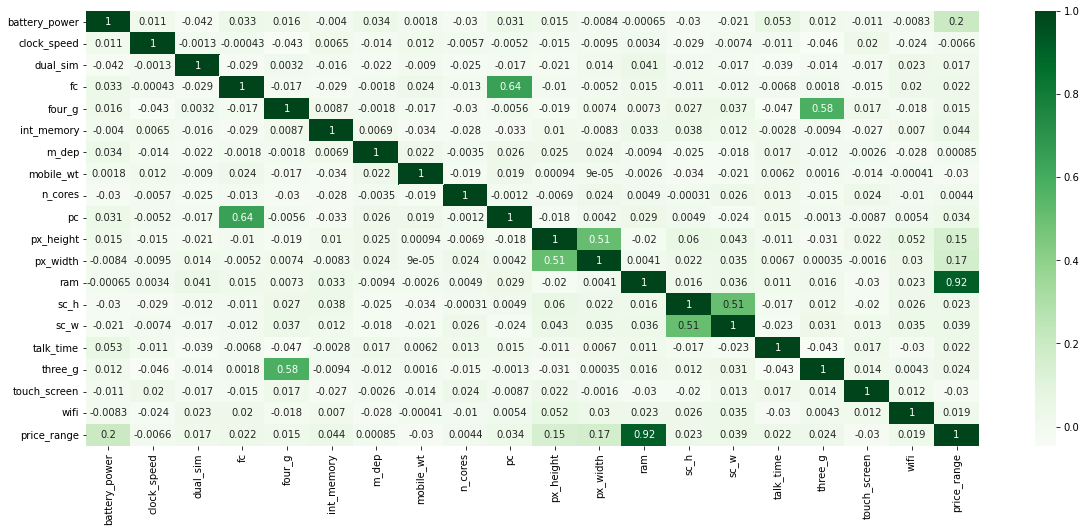

In [ ]:
plt.figure(figsize=(20, 8))
correlation_rate = data_train.corr()
sns.heatmap(correlation_rate, annot = True, cmap = "Greens")


**Here we can see that there is strong positive correlation between price range and RAM. Also, price range, battery power and 4G/3G. Other features have small positive correlation.**

** 4) Exploring : We will explore columns of TRAIN dataset about RAM, 4G/3G and Battery Power, because these columns are important for our future modeling.**

In [ ]:
data_train.columns

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
selected=["battery_power", "ram" , "three_g", "price_range", "px_height" , "px_width", "fc"]

In [ ]:
sns.pairplot(data_train[0:],hue='price_range', palette="Blues" )

Output hidden; open in https://colab.research.google.com to view.

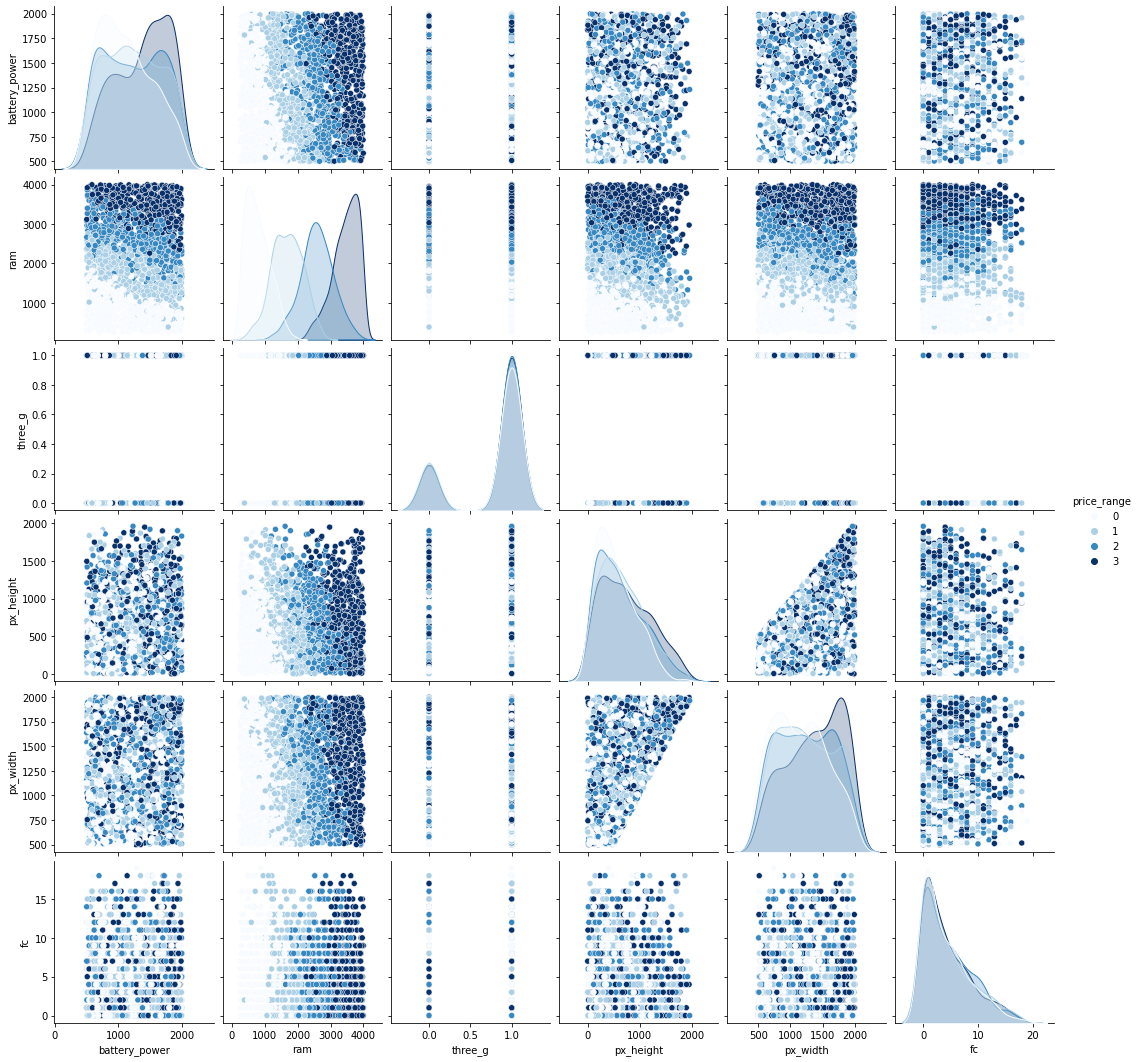

In [ ]:
sns.pairplot(data_train[selected],hue='price_range', palette="Blues" )

***4.1) RAM***

In [ ]:
print(f"Max RAM value is: {data_train['ram'].max()} MB")
print(f"Min RAM value is: {data_train['ram'].min()} MB")
print(f"Mean of RAM values is: {round(data_train['ram'].mean())} MB")

Max RAM value is: 3998 MB
Min RAM value is: 256 MB
Mean of RAM values is: 2124 MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'RAM value')

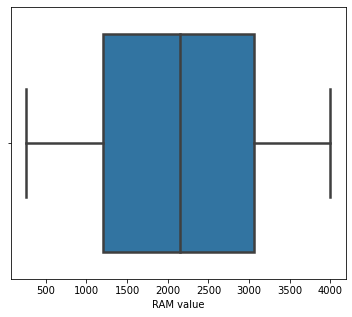

In [ ]:
plt.figure(figsize=[6, 5])
sns.boxplot(data_train['ram'], linewidth=2.5)
plt.xlabel("RAM value")

In [ ]:
cheap = data_train["ram"][data_train["price_range"] == 1]
medium = data_train["ram"][data_train["price_range"] == 2]
expensive = data_train["ram"][data_train["price_range"] == 3]
price_ram_data = pd.DataFrame({"Low Price" : cheap,   "Medium Price" : medium,  "High Price" : expensive})

Text(0, 0.5, 'RAM')

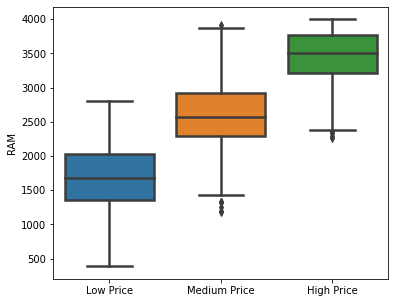

In [ ]:
plt.figure(figsize=[6, 5])
sns.boxplot(data = price_ram_data, linewidth=2.5)
plt.ylabel("RAM")

**In these boxplots we can see:** 
**1)	In the first graph we can see maximum, minimum, median and mean of whole RAM column.**
**2)	In the second graph we can see comparison of price ranges and RAM amount in smartphones of these ranges.**

 *4.2) Battery power*

In [ ]:
print(f"Max Battery Power value is: {data_train['battery_power'].max()} mAh")
print(f"Min Battery Power value is: {data_train['battery_power'].min()} mAh")
print(f"Mean of Battery Power values is: {round(data_train['battery_power'].mean())} mAh")

Max Battery Power value is: 1998 mAh
Min Battery Power value is: 501 mAh
Mean of Battery Power values is: 1239 mAh


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Battery Power value')

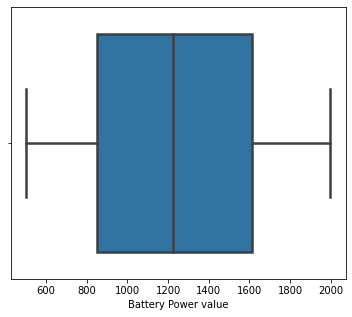

In [ ]:
plt.figure(figsize=[6, 5])
sns.boxplot(data_train['battery_power'], linewidth=2.5)
plt.xlabel("Battery Power value")

In [ ]:
cheap = data_train["battery_power"][data_train["price_range"] == 1]
medium = data_train["battery_power"][data_train["price_range"] == 2]
expensive = data_train["battery_power"][data_train["price_range"] == 3]
price_bp_data = pd.DataFrame({"Low Price" : cheap, "Medium Price" : medium, "High Price" : expensive})

Text(0, 0.5, 'Battery Power')

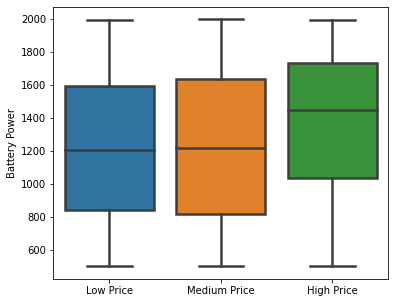

In [ ]:
plt.figure(figsize=[6, 5])
sns.boxplot(data = price_bp_data, linewidth=2.5)
plt.ylabel("Battery Power")

**In these boxplots we can see that:** **1)	In the first graph we can see maximum, minimum, median and mean of whole Battery Power column.**
**2)	In the second graph we can see comparison of price ranges and Battery Power amount in smartphones of these ranges. It is very interesting, because Battery Power values is almost similar in every price range.**

***4.3) 3G/4G***

In [ ]:
three_g = data_train["three_g"].value_counts().values
labels = ["Supported", "Not Supported"]

Text(0.5, 1.0, 'Is 3G supported?')

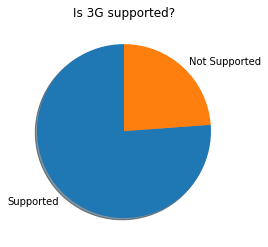

In [ ]:
plt.figure(figsize=[6, 4])
plt.pie(three_g, labels = labels, shadow=True, startangle=90)
plt.title("Is 3G supported?")

Text(0.5, 1.0, 'Is dual sim supported?')

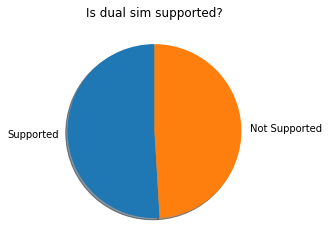

In [ ]:
dual_sim = data_train["dual_sim"].value_counts().values
plt.figure(figsize=[6, 4])
plt.pie(dual_sim, labels = labels, shadow=True, startangle=90)
plt.title("Is dual sim supported?")

In [ ]:
four_g = data_train["four_g"].value_counts().values
labels = ["4G Supported", "Not Supported"]

Text(0.5, 1.0, 'Is 4G supported?')

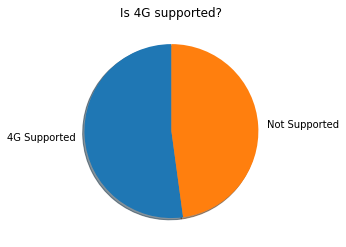

In [ ]:
plt.figure(figsize=[6, 4])
plt.pie(four_g, labels = labels, shadow=True, startangle=90)
plt.title("Is 4G supported?")

**REMOVING OUTLIERS**

In [ ]:
''' Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, 
we will need to use the mathematical formula and retrieve the outlier data.'''
# First we will calculate IQR,
Q1 = data_train.quantile(0.25)
Q3 = data_train.quantile(0.75)
IQR = Q3 - Q1
print("IQR details for all columns : ", IQR)

'''  As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. 
The data point where we have False that means these values are valid whereas True indicates presence of an outlier. '''
new_data= data_train[~((data_train < (Q1 - 1.5 * IQR)) |(data_train > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data after removing outliers : ", new_data)
new_data.shape

IQR details for all columns :  battery_power     763.50
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
price_range         1.50
dtype: float64
Data after removing outliers :        battery_power  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
1              1021          0.5         1   0       1          53    0.7   
2               563          0.5         1   2       1          41    0.9   
3               615          2.5         0   0       0          10    0.8   
4              1821          1.2         0  13       1          44    0.6   
5              1859          0.5     

(1506, 20)

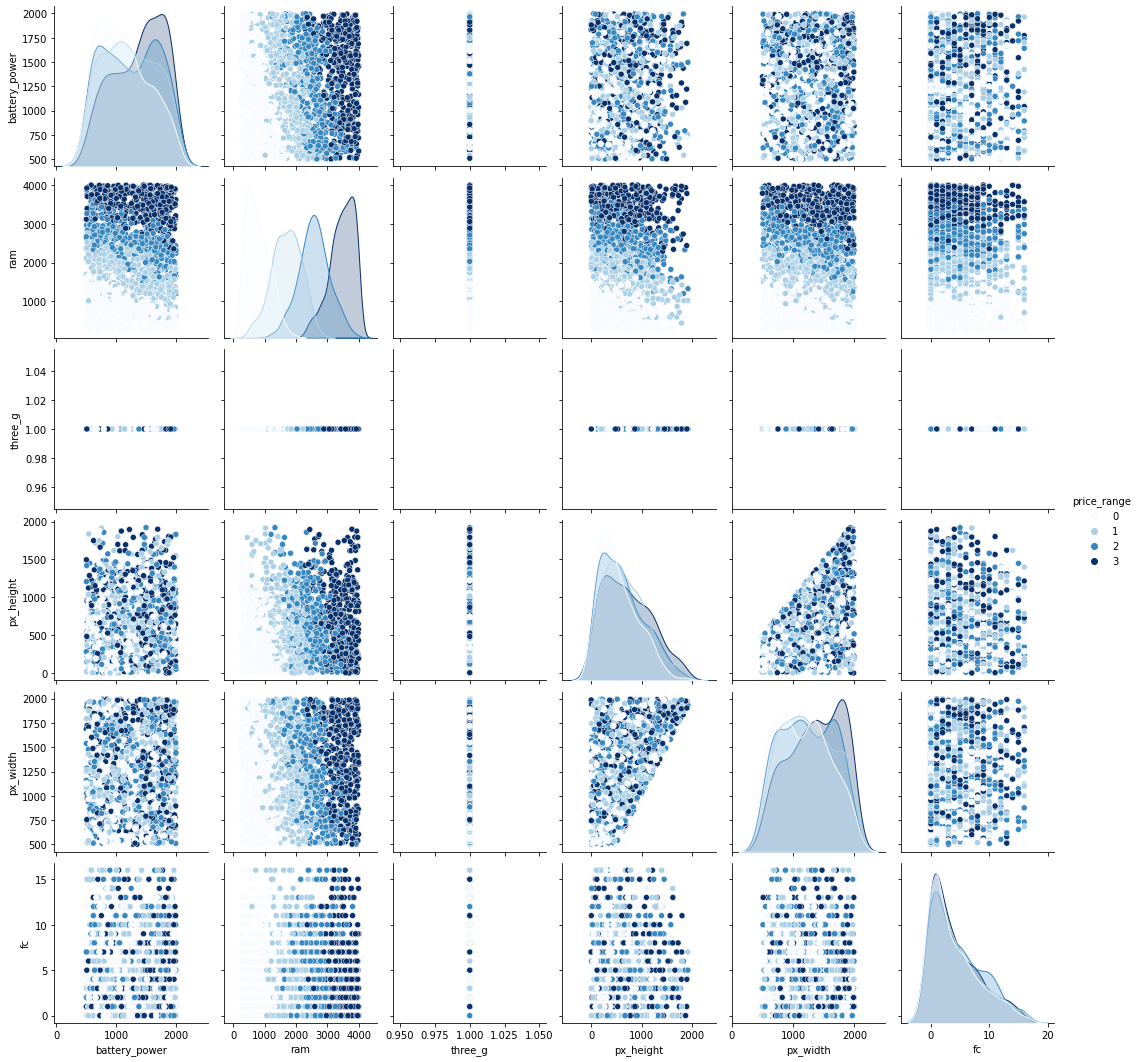

In [ ]:
sns.pairplot(new_data[selected],hue='price_range', palette="Blues" )

**5) Modelling**

**Before modelling we have to prepare data. Let’s do this:**

In [ ]:
X = data_train.drop(["price_range"], axis = 1)
Y = data_train["price_range"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 25)

In [ ]:
new_data.columns

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X = new_data.drop(["price_range"], axis = 1)
Y = new_data["price_range"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 25)

**Now various models will be used. As our task is to classify price range (1,2,3) ; thats why creating classification models.**

In [ ]:
X.info

<bound method DataFrame.info of       battery_power  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
1              1021          0.5         1   0       1          53    0.7   
2               563          0.5         1   2       1          41    0.9   
3               615          2.5         0   0       0          10    0.8   
4              1821          1.2         0  13       1          44    0.6   
5              1859          0.5         1   3       0          22    0.7   
...             ...          ...       ...  ..     ...         ...    ...   
1995            794          0.5         1   0       1           2    0.8   
1996           1965          2.6         1   0       0          39    0.2   
1997           1911          0.9         1   1       1          36    0.7   
1998           1512          0.9         0   4       1          46    0.1   
1999            510          2.0         1   5       1          45    0.9   

      mobile_wt  n_cores  pc  px_height  px

*Logistic Regression*

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
print(f"Score is {log_reg.score(X_test, Y_test)}")

Score is 0.68


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
prediction1=log_reg.predict(X_test)
print(classification_report(Y_test, prediction1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.86      0.86      0.86         7
           2       0.33      0.40      0.36         5
           3       0.60      0.43      0.50         7

    accuracy                           0.68        25
   macro avg       0.66      0.67      0.66        25
weighted avg       0.68      0.68      0.67        25



*Decision Tree*

In [ ]:
tree = DecisionTreeClassifier(max_depth = 9)
tree.fit(X_train, Y_train)
print(f"Score is {tree.score(X_test, Y_test)}")

Score is 0.92


In [ ]:
prediction2=tree.predict(X_test)
print(classification_report(Y_test, prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.86      0.92         7
           2       0.71      1.00      0.83         5
           3       1.00      0.86      0.92         7

    accuracy                           0.92        25
   macro avg       0.93      0.93      0.92        25
weighted avg       0.94      0.92      0.92        25



*KNN*

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
print(f"Score is {knn.score(X_test, Y_test)}")

Score is 0.92


In [ ]:
prediction3 = knn.predict(X_test)
print(classification_report(Y_test, prediction3))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      0.86      0.86         7
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         7

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



*Random Forest Classifier*

In [ ]:
forest = RandomForestClassifier(n_estimators = 300)
forest.fit(X_train, Y_train)
print(f"Score is {forest.score(X_test, Y_test)}")

Score is 0.96


In [ ]:
prediction4 = forest.predict(X_test)
print(classification_report(Y_test, prediction4))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           0.96        25
   macro avg       0.97      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



*SVM*

In [ ]:
from sklearn.svm import SVC
supvec=SVC(kernel='rbf')
supvec.fit(X_train, Y_train)
prediction5=supvec.predict(X_test)


print(f"Score is {supvec.score(X_test, Y_test)}")
print(classification_report(Y_test, prediction5))

Score is 0.92
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      1.00      0.93         7
           2       1.00      0.80      0.89         5
           3       0.88      1.00      0.93         7

    accuracy                           0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25



** Random Forest has given high accuracy/score..**

**6) Conclusion.**

In [ ]:
data_test.columns

Index(['id', 'battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
data_train.columns

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**A new dataset is created with our prediction values by Random Forest model**

In [ ]:
print("DATA PREDICTION BY RANDOM FOREST ON TEST DATASET \n")
prediction_price = forest.predict(data_test.drop(["id"], axis = 1))
prepared_data = data_test
prepared_data["Predicted Price"] = prediction_price
prepared_data.head(5)

,id,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted Price
0,1,1043,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
